## Разработка стратегии на основе паттернов и индикаторов

План работы:
1. Написание стратегии на основе индикатора
1.1 Выкачать датасет с акциями гугла в формате дневных свечей
1.2 Построить индикатор моментум и сигналы на основе индикатора
1.3 Протестировать стратегию, посчитать прибыль и убытки
2. Написание стратегии на основе алгоритма МО
2.1 Добавление индикаторов в датасет
2.2 Расчета таргета для обучения модели
2.3 Обучение алгоритма
2.4 Тестирование стратегии

Вывод:
И стратегия на основе моментума, и стратегия на основе решающих деревьев показали результат меньше единицы, то есть прибыль получить не удалось


In [77]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ticker_symbol = "GOOG"

# Set the start and end dates for the data
start_date = "2018-01-01"
end_date = "2022-12-31"

# Fetch historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

ts = data['Close'].values[:-5]
time = np.arange(len(ts))

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

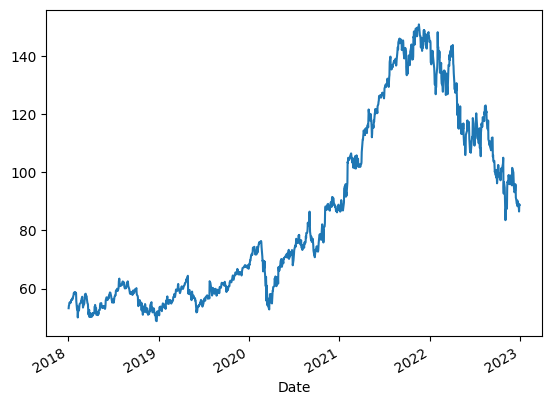

In [78]:
data['Close'].plot()

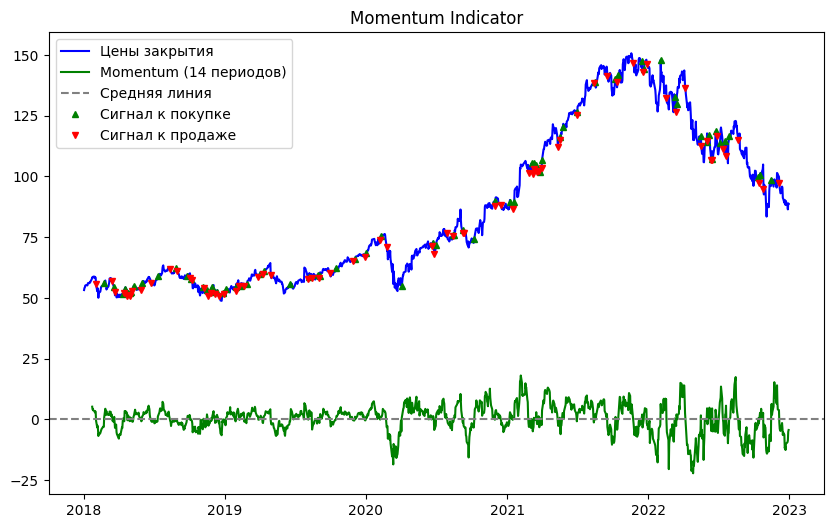

In [79]:
close_prices = data['Close']

# Выбор периода для индикатора Momentum
momentum_period = 14

# Расчет индикатора Momentum
momentum = close_prices.diff(momentum_period)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(close_prices.index, close_prices, label='Цены закрытия', color='blue')
plt.plot(momentum.index, momentum, label=f'Momentum ({momentum_period} периодов)', color='green')
plt.axhline(0, linestyle='--', color='gray', label='Средняя линия')

# Сигналы к покупке
buy_signals = (momentum > 0) & (momentum.shift(1) <= 0)
plt.plot(buy_signals[buy_signals].index, close_prices[buy_signals], '^', markersize=5, color='g', label='Сигнал к покупке')

# Сигналы к продаже
sell_signals = (momentum < 0) & (momentum.shift(1) >= 0)
plt.plot(sell_signals[sell_signals].index, close_prices[sell_signals], 'v', markersize=5, color='r', label='Сигнал к продаже')

plt.title('Momentum Indicator')
plt.legend()
plt.show()


In [80]:
def cumulative_product(input_list):
    result = [1]  # Initialize the result list with 1 for the cumulative product
    product = 1

    for value in input_list:
        product *= value
        result.append(product)

    return result

Buy signal at 2018-02-23 00:00:00, buy price: 56.34
Sell signal at 2018-03-16 00:00:00, sell price: 56.79
Buy signal at 2018-03-21 00:00:00, buy price: 54.54
Sell signal at 2018-03-22 00:00:00, sell price: 52.45
Buy signal at 2018-04-13 00:00:00, buy price: 51.46
Sell signal at 2018-04-16 00:00:00, sell price: 51.90
Buy signal at 2018-04-17 00:00:00, buy price: 53.71
Sell signal at 2018-04-24 00:00:00, sell price: 51.00
Buy signal at 2018-04-26 00:00:00, buy price: 52.00
Sell signal at 2018-04-30 00:00:00, sell price: 50.87
Buy signal at 2018-05-01 00:00:00, buy price: 51.87
Sell signal at 2018-05-02 00:00:00, sell price: 51.22
Buy signal at 2018-05-04 00:00:00, buy price: 52.41
Sell signal at 2018-05-07 00:00:00, sell price: 52.74
Buy signal at 2018-05-10 00:00:00, buy price: 54.88
Sell signal at 2018-05-30 00:00:00, sell price: 53.39
Buy signal at 2018-06-01 00:00:00, buy price: 55.97
Sell signal at 2018-06-25 00:00:00, sell price: 56.24
Buy signal at 2018-07-12 00:00:00, buy price: 

/var/folders/81/yw6xgq091p3723npv2n8np2r0000gq/T/ipykernel_83538/4102465958.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if buy_signals[i] and in_position == 0:
/var/folders/81/yw6xgq091p3723npv2n8np2r0000gq/T/ipykernel_83538/4102465958.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif sell_signals[i] and in_position == 1:
/var/folders/81/yw6xgq091p3723npv2n8np2r0000gq/T/ipykernel_83538/4102465958.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by 

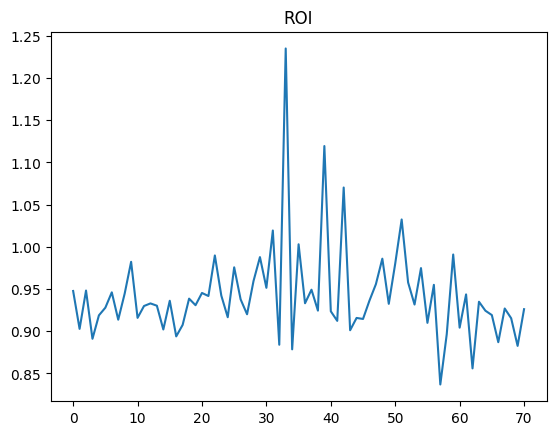

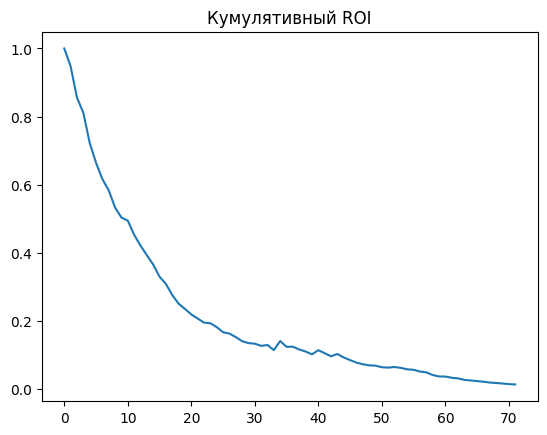

Итоговый ROI: 0.012912080370773097
Количество сделок: 72


In [81]:
in_position = 0
in_price = 0
roi = []
fee=0.03
# Симуляция торговли
for i in range(len(data)):
    if buy_signals[i] and in_position == 0:
        in_price = close_prices[i]
        in_position = 1
        print(f'Buy signal at {data.index[i]}, buy price: {in_price:.2f}')

    elif sell_signals[i] and in_position == 1:
        # Сигнал к продаже: закрываем позицию
        out_price = close_prices[i]
        in_position = 0
        roi.append(1 + (out_price * (1-fee) - in_price * (1+fee)) / in_price)
        print(f'Sell signal at {data.index[i]}, sell price: {out_price:.2f}')

cumulative_roi = cumulative_product(roi)
plt.plot(roi)
plt.title("ROI")
plt.show()
plt.plot(cumulative_roi)
plt.title("Кумулятивный ROI")
plt.show()
print(f"Итоговый ROI: {cumulative_roi[-1]}")
print(f"Количество сделок: {len(cumulative_roi)}")


## Попробуем обучить алгоритм машинного обучения с помощью индикаторов

In [82]:
import pandas_ta as ta
import lightgbm as lgb # берем именно эту реализацию, потому что она легкая и быстрая
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [83]:
df = data[['Close']].copy()

In [84]:
df['macd'] = ta.macd(df['Close'])['MACD_12_26_9'].values

df.ta.bbands(close='Close', length=10, append=True)
df.ta.bbands(close='Close', length=50, append=True)
df['ema10'] = ta.ema(df['Close'], 10).values
df['ema50'] = ta.ema(df['Close'], 50).values
df['ema100'] = ta.ema(df['Close'], 100).values

df = df.dropna()   
df

,Close,macd,BBL_10_2.0,BBM_10_2.0,BBU_10_2.0,BBB_10_2.0,BBP_10_2.0,BBL_50_2.0,BBM_50_2.0,BBU_50_2.0,BBB_50_2.0,BBP_50_2.0,ema10,ema50,ema100
Date,,,,,,,,,,,,,,,
2018-05-24,53.962002,0.379854,53.051544,54.063250,55.074956,3.742675,0.449962,49.267621,52.72395,56.180279,13.111040,0.679099,53.785954,53.339392,54.164165
2018-05-25,53.783001,0.356719,53.104638,53.950250,54.795863,3.134785,0.401108,49.455466,52.65003,55.844594,12.135090,0.677328,53.785417,53.356789,54.156617
2018-05-29,53.015999,0.273343,53.075630,53.750850,54.426071,2.512408,-0.044157,49.604034,52.57462,55.545206,11.300455,0.574292,53.645523,53.343425,54.134031
2018-05-30,53.389999,0.234740,53.002908,53.693700,54.384493,2.573086,0.280179,49.643229,52.54260,55.441971,11.036269,0.646135,53.599064,53.345251,54.119298
2018-05-31,54.249500,0.270384,52.976741,53.709800,54.442860,2.729704,0.868115,49.666376,52.52988,55.393384,10.902380,0.800265,53.717325,53.380712,54.121876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,89.809998,-1.985857,86.408364,91.387999,96.367634,10.897788,0.341555,85.429302,95.19860,104.967898,20.524036,0.224207,91.177677,95.880880,100.763813
2022-12-27,87.930000,-2.135107,85.684478,90.824999,95.965521,11.319618,0.218414,85.052937,95.01360,104.974263,20.966815,0.144421,90.587191,95.569081,100.509678
2022-12-28,86.459999,-2.344974,85.367247,89.885999,94.404752,10.054407,0.120913,84.623749,94.72720,104.830651,21.331679,0.090872,89.836792,95.211862,100.231466


In [85]:
threshold = 0.001

def set_target(df):
    df['signal'] = 0
    df['future_delta1_midprice'] = df['Close'].pct_change().shift(-1)
    df = df.dropna()

    df.loc[df['future_delta1_midprice']  > threshold, 'signal'] = 1
    df.loc[(df['future_delta1_midprice'] < 0) & (abs(df['future_delta1_midprice']) > threshold/2), 'signal'] = -1
    df = df.drop(['future_delta1_midprice'], axis=1)
    return df


In [86]:
df = set_target(df)

In [87]:
X = df.drop('signal', axis=1)
y = df['signal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [88]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 811, number of used features: 15
[LightGBM] [Info] Start training from score -0.831800
[LightGBM] [Info] Start training from score -2.869627
[LightGBM] [Info] Start training from score -0.677245
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

LGBMClassifier()

In [89]:
dict(zip(df.columns, clf.feature_importances_))

{'Close': 606,
 'macd': 949,
 'BBL_10_2.0': 563,
 'BBM_10_2.0': 321,
 'BBU_10_2.0': 436,
 'BBB_10_2.0': 1118,
 'BBP_10_2.0': 1420,
 'BBL_50_2.0': 357,
 'BBM_50_2.0': 185,
 'BBU_50_2.0': 306,
 'BBB_50_2.0': 1022,
 'BBP_50_2.0': 913,
 'ema10': 328,
 'ema50': 152,
 'ema100': 298}

In [90]:
y_pred=clf.predict(X_test)
pd.Series(y_pred).value_counts()

 1    190
-1    143
 0     15
Name: count, dtype: int64

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.45      0.38      0.41       171
           0       0.00      0.00      0.00        12
           1       0.47      0.54      0.50       165

    accuracy                           0.44       348
   macro avg       0.31      0.31      0.31       348
weighted avg       0.45      0.44      0.44       348


Buy signal at 2020-04-02 00:00:00, buy price: 54.12
Sell signal at 2020-01-28 00:00:00, sell price: 55.13
Buy signal at 2020-03-16 00:00:00, buy price: 55.28
Sell signal at 2020-02-25 00:00:00, sell price: 56.09
Buy signal at 2019-03-26 00:00:00, buy price: 56.88
Sell signal at 2022-11-16 00:00:00, sell price: 57.79
Buy signal at 2020-09-24 00:00:00, buy price: 58.21
Sell signal at 2018-12-13 00:00:00, sell price: 58.18
Buy signal at 2021-09-20 00:00:00, buy price: 54.03
Sell signal at 2021-02-16 00:00:00, sell price: 52.60
Buy signal at 2021-12-10 00:00:00, buy price: 52.60
Sell signal at 2018-08-30 00:00:00, sell price: 53.49
Buy signal at 2021-03-12 00:00:00, buy price: 55.12
Sell signal at 2021-12-20 00:00:00, sell price: 55.57
Buy signal at 2020-04-03 00:00:00, buy price: 57.19
Sell signal at 2018-11-07 00:00:00, sell price: 55.91
Buy signal at 2021-03-05 00:00:00, buy price: 55.24
Sell signal at 2021-10-19 00:00:00, sell price: 54.55
Buy signal at 2018-09-27 00:00:00, buy price: 

/var/folders/81/yw6xgq091p3723npv2n8np2r0000gq/T/ipykernel_83538/603725670.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  in_price = close_prices[i]
/var/folders/81/yw6xgq091p3723npv2n8np2r0000gq/T/ipykernel_83538/603725670.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_price = close_prices[i]


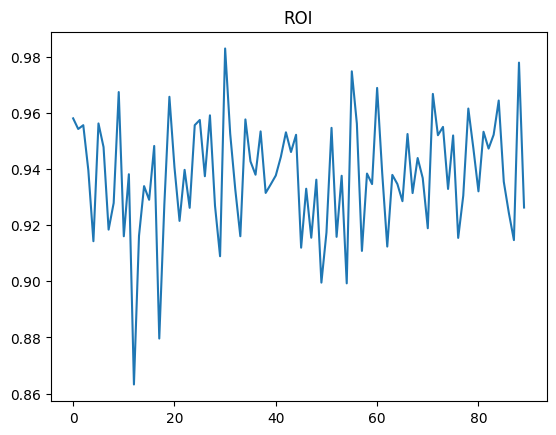

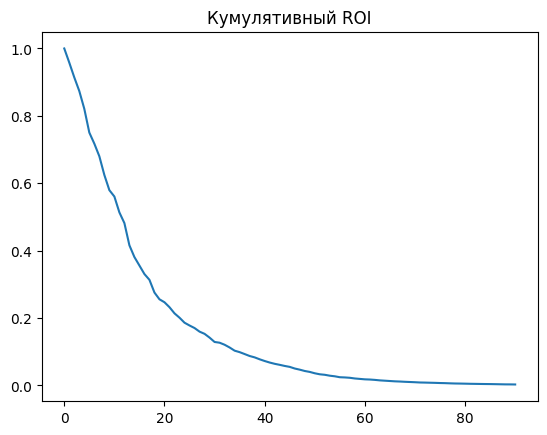

Итоговый ROI: 0.0029758745028858
Количество сделок: 91


In [92]:
in_position = 0
in_price = 0
roi = []
fee=0.03
# Симуляция торговли
for i in range(len(X_test)):
    if y_pred[i]==1 and in_position == 0:
        in_price = close_prices[i]
        in_position = 1
        print(f'Buy signal at {X_test.index[i]}, buy price: {in_price:.2f}')

    elif y_pred[i]==-1 and in_position == 1:
        # Сигнал к продаже: закрываем позицию
        out_price = close_prices[i]
        in_position = 0
        roi.append(1 + (out_price * (1-fee) - in_price * (1+fee)) / in_price)
        print(f'Sell signal at {X_test.index[i]}, sell price: {out_price:.2f}')

cumulative_roi = cumulative_product(roi)
plt.plot(roi)
plt.title("ROI")
plt.show()
plt.plot(cumulative_roi)
plt.title("Кумулятивный ROI")
plt.show()
print(f"Итоговый ROI: {cumulative_roi[-1]}")
print(f"Количество сделок: {len(cumulative_roi)}")
